In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

# 1. تحميل الداتا
df = pd.read_csv('bad_reviews.csv')

# 2. تحميل الـ Stop Words البرتغالية
nltk.download('stopwords')
portuguese_stops = set(stopwords.words('portuguese'))

# 3. تعريف قائمة كلمات التأخير (اللي إحنا خلاص عارفينها)
# (تأخير، موعد نهائي، لم يصل، توصيل، إلخ)
delivery_related_words = {
    'atraso', 'atrasada', 'demora', 'demorou', 'prazo', 'entrega',
    'entregue', 'recebi', 'recebido', 'nao', 'não', 'ainda', 'chegou'
}

# 4. دمج كل الـ Stop Words
all_stops = portuguese_stops.union(delivery_related_words)

# 5. دالة التنظيف
def clean_text(text):
    # تحويل الحروف لكبيرة (Lowercase)
    text = str(text).lower()
    # إزالة علامات الترقيم
    text = text.translate(str.maketrans('', '', string.punctuation))
    # إزالة الأرقام
    text = text.translate(str.maketrans('', '', string.digits))

    # تقسيم النص لكلمات (Tokenization) وإزالة الـ Stop Words
    cleaned_words = [word for word in text.split() if word not in all_stops]

    # تجميع الكلمات النظيفة تاني في جملة
    return " ".join(cleaned_words)

# 6. تطبيق الدالة على الداتا بتاعتنا
df['cleaned_comment'] = df['review_comment_message'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


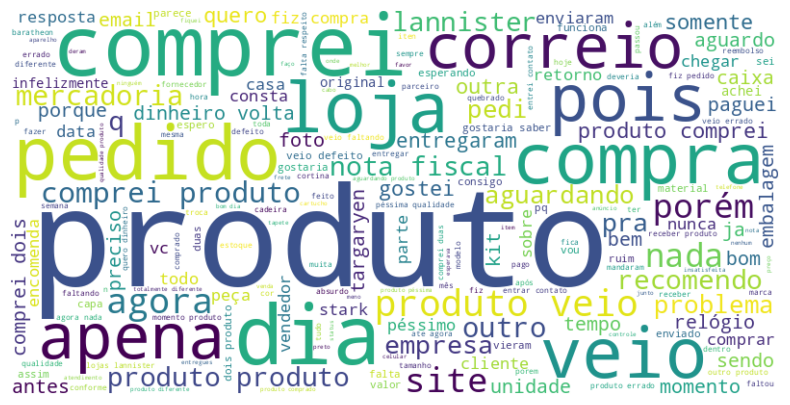

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. تجميع كل التعليقات النظيفة في نص واحد كبير
all_text = " ".join(comment for comment in df.cleaned_comment)

# 2. إنشاء الـ Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# 3. عرض الصورة
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# New Section

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 1. تحويل النصوص لأرقام (Vectorization)
# هنركز على أهم 1000 كلمة
vectorizer = TfidfVectorizer(max_features=1000, stop_words=list(all_stops))
tfidf_matrix = vectorizer.fit_transform(df['cleaned_comment'].dropna())

# 2. بناء موديل LDA
# هنطلب منه يلاقي 4 مواضيع (Topics) رئيسية غير التأخير
n_topics = 4
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(tfidf_matrix)

# 3. دالة لطباعة المواضيع
def print_topics(model, vectorizer, n_top_words):
    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"\n🔥 Topic #{idx+1}:")
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# 4. اعرض أهم 5 كلمات في كل موضوع
print_topics(lda, vectorizer, 5)


🔥 Topic #1:
produto agora dia compra loja

🔥 Topic #2:
produto veio defeito outro diferente

🔥 Topic #3:
comprei apenas dois produtos duas

🔥 Topic #4:
produto veio qualidade quero bom
